<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/LungInfectionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the necessary libraries**

In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.options.display.max_colwidth = 100
import random
import os
from numpy.random import seed
seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
from tensorflow.random import set_seed
set_seed(42)
import warnings
warnings.filterwarnings('ignore')

## **Specify Parameters**

In [ ]:
IMG_SIZE=48
BATCH=32
SEED=42

In [ ]:
main_path = '/content/drive/MyDrive/datasets/lunginf/data'
train_path = os.path.join(main_path,"train")
test_path = os.path.join(main_path,"test")

In [ ]:
train_Healthy=glob.glob(train_path+"/Healthy/*.jpeg")
train_Type_1=glob.glob(train_path+"/Type 1 disease/*.jpeg")
train_Type_1.extend(glob.glob(train_path+"/Type 1 disease/*.jpg"))
train_Type_1.extend(glob.glob(train_path+"/Type 1 disease/*.png"))
train_Type_2=glob.glob(train_path+"/Type 2 disease/*.jpeg")

In [ ]:
test_Healthy=glob.glob(test_path+"/Healthy/*.jpeg")
test_Type_1=glob.glob(test_path+"/Type 1 disease/*.jpeg")
test_Type_1.extend(glob.glob(test_path+"/Type 1 disease/*.jpg"))
test_Type_1.extend(glob.glob(test_path+"/Type 1 disease/*.png"))
test_Type_2=glob.glob(test_path+"/Type 2 disease/*.jpeg")

In [ ]:
train_list=[x for x in train_Healthy]
train_list.extend([x for x in train_Type_1])
train_list.extend([x for x in train_Type_2])
df_train=pd.DataFrame(np.concatenate([['Healthy']*len(train_Healthy),
                                      ['Type 1 disease']*len(train_Type_1),
                                      ['Type 2 disease']*len(train_Type_2)]),
                      columns=['class'])
df_train['image']=[x for x in train_list]

In [ ]:
test_list=[x for x in test_Healthy]
test_list.extend([x for x in test_Type_1])
test_list.extend([x for x in test_Type_2])
df_test=pd.DataFrame(np.concatenate([['Healthy']*len(test_Healthy),
                                      ['Type 1 disease']*len(test_Type_1),
                                      ['Type 2 disease']*len(test_Type_2)]),
                      columns=['class'])
df_test['image']=[x for x in test_list]

In [ ]:
df_train.shape

(251, 2)

In [ ]:
df_test.shape

(66, 2)

## **Plot distribution for train and test images**

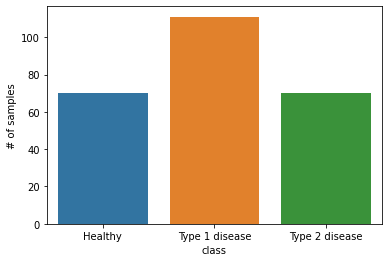

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='class',data=df_train)
plt.xlabel('class')
plt.ylabel('# of samples')
plt.xticks([0,1,2],['Healthy','Type 1 disease', 'Type 2 disease'])
plt.show()

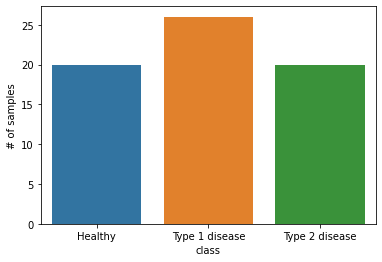

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='class',data=df_test)
plt.xlabel('class')
plt.ylabel('# of samples')
plt.xticks([0,1,2],['Healthy','Type 1 disease', 'Type 2 disease'])
plt.show()

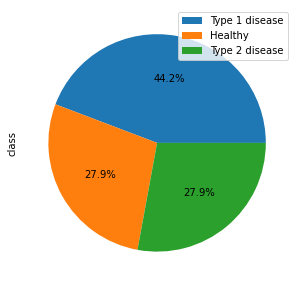

In [ ]:
plt.figure(figsize=(7,5))
df_train['class'].value_counts().plot(kind='pie', labels=['','',''], autopct='%1.1f%%')
ind = df_train['class'].value_counts().index
plt.legend(labels=[ind[0], ind[1], ind[2]])
plt.show()

## **Plot sample images for all the classes**

Train Set - Healthy


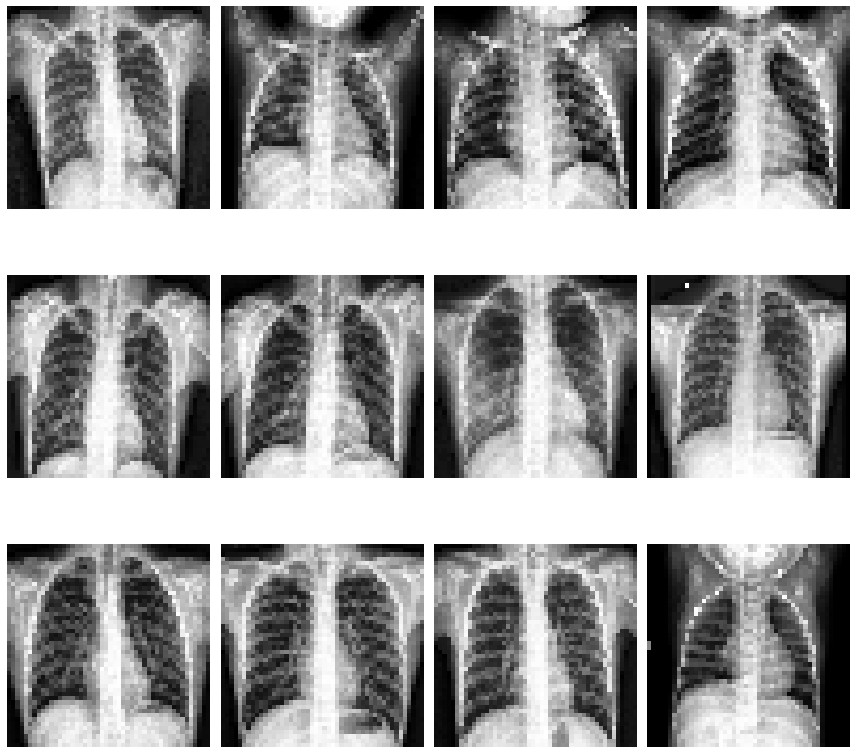

In [ ]:
print('Train Set - Healthy')
plt.figure(figsize=(12,12))
for i in range(0, 12):
    plt.subplot(3,4,i+1)
    img = cv2.imread(train_Healthy[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Train Set - Type 1 disease


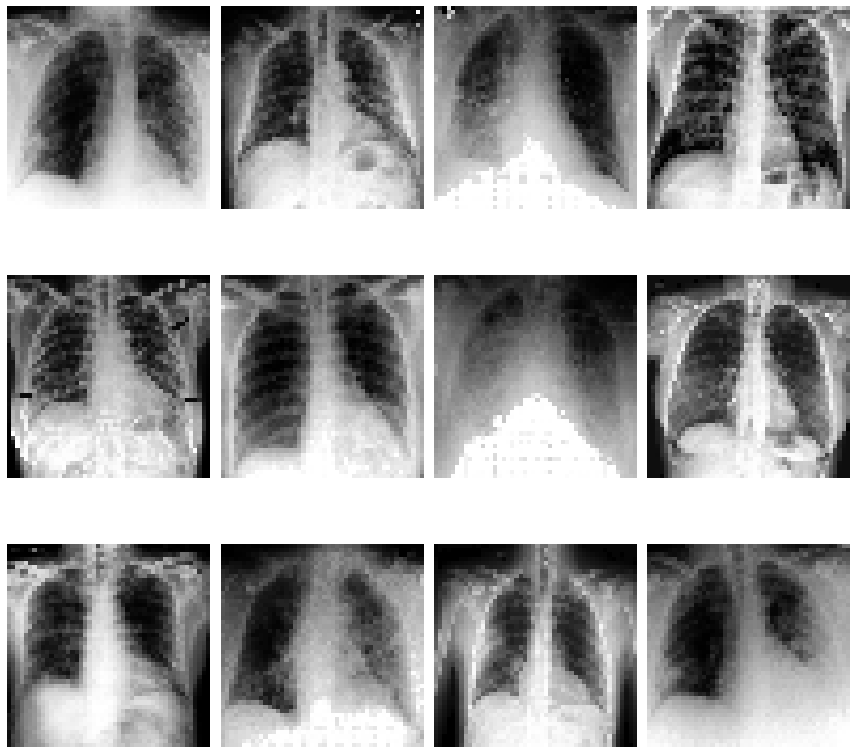

In [ ]:
print('Train Set - Type 1 disease')
plt.figure(figsize=(12,12))
for i in range(0, 12):
    plt.subplot(3,4,i+1)
    img = cv2.imread(train_Type_1[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Train Set - Type 2 disease


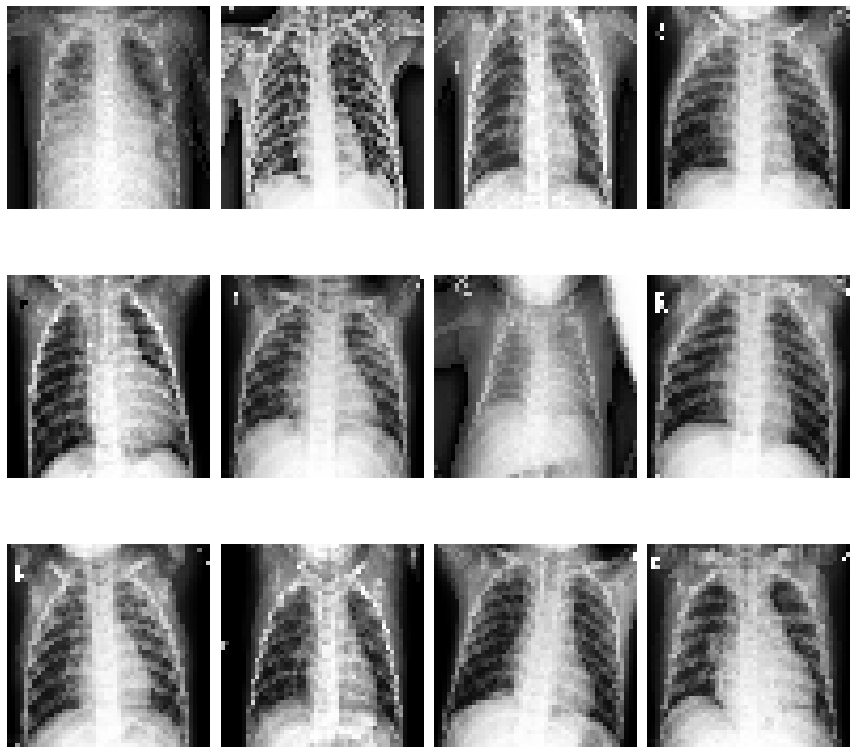

In [ ]:
print('Train Set - Type 2 disease')
plt.figure(figsize=(12,12))
for i in range(0, 12):
    plt.subplot(3,4,i+1)
    img = cv2.imread(train_Type_2[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Test Set - Healthy


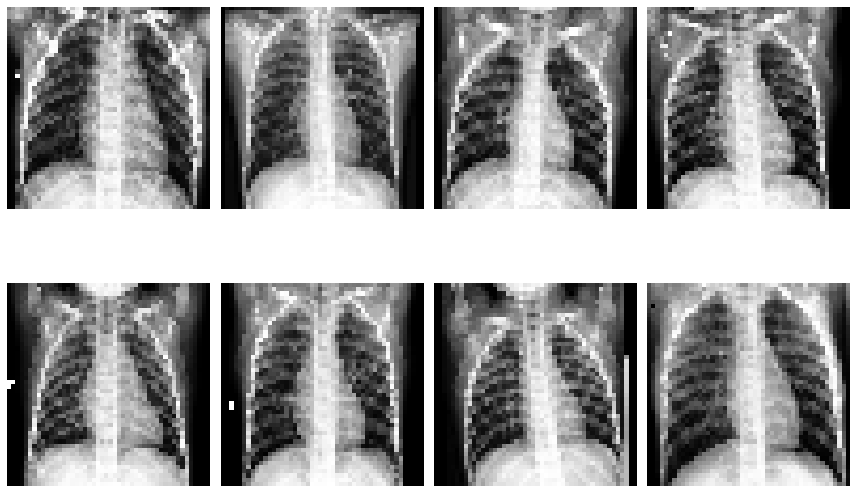

In [ ]:
print('Test Set - Healthy')
plt.figure(figsize=(12,12))
for i in range(0, 8):
    plt.subplot(3,4,i+1)
    img = cv2.imread(test_Healthy[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Test Set - Type 1 disease


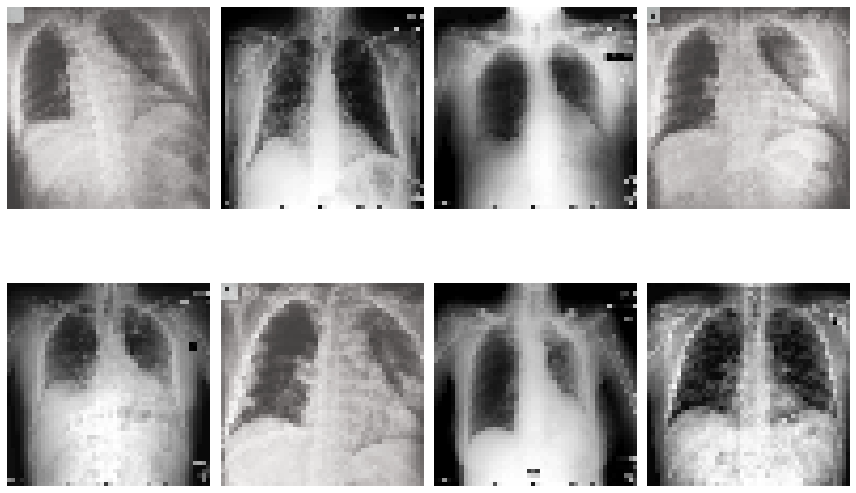

In [ ]:
print('Test Set - Type 1 disease')
plt.figure(figsize=(12,12))
for i in range(0, 8):
    plt.subplot(3,4,i+1)
    img = cv2.imread(test_Type_1[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Test Set - Type 2 disease


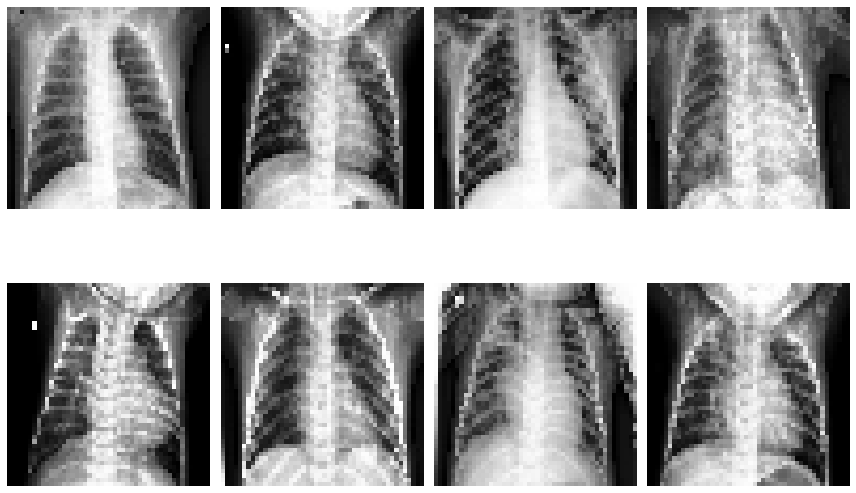

In [ ]:
print('Test Set - Type 2 disease')
plt.figure(figsize=(12,12))
for i in range(0, 8):
    plt.subplot(3,4,i+1)
    img = cv2.imread(test_Type_2[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

## **Data Augmentation**

1.   Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

2.   Build a data augmentation for test data to create new data and rescale the image at 48x48

3.   Read images directly from the train folder and test folder using the appropriate function

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                 zoom_range=0.1,
                                 rotation_range=0.1,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
df_train.columns

Index(['class', 'image'], dtype='object')

In [ ]:
ds_train = train_datagen.flow_from_dataframe(df_train,
                                             x_col='image',
                                             y_col='class',
                                             target_size=(IMG_SIZE, IMG_SIZE),
                                             batch_size=BATCH,
                                             seed=SEED)

ds_test = test_datagen.flow_from_dataframe(df_test,
                                             x_col='image',
                                             y_col='class',
                                             target_size=(IMG_SIZE, IMG_SIZE),
                                             batch_size=BATCH,
                                             seed=SEED)

Found 251 validated image filenames belonging to 3 classes.
Found 66 validated image filenames belonging to 3 classes.


## **Build CNN Model - 1st Model : CNN architecture**

1.   Add convolutional layers with different filters, max pool layers, dropout layers, and batch normalization layers  

1.   Use Relu as an activation function

1.   Take the loss function as categorical cross-entropy

1.   Take rmsprop as an optimizer

1.   Use early stopping with the patience of two epochs and monitor the validation loss or accuracy

1.   Try with ten numbers epoch

1.   Train the model using a generator and test the accuracy of the test data at every epoch

1.   Plot the training and validation accuracy, and the loss

1.   Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [ ]:
# Setting the callbacks for Early Stopping
early_stopping=callbacks.EarlyStopping(monitor='val_loss',
                                       patience=2,
                                       restore_best_weights=True)

**CNN Architecture** << Define a function for architecture >>

1.   Conv Layer - 3, filters - 16, 32, 64
2.   Batch normalization layer
3.   Dropout layers
4.   Maxpooling
5.   Flatten



In [ ]:
# Model architecture using color images
# For gray scale images, Input shape will change to IMG_SIZE,IMG_SIZE, & kernel_size may also change

def get_model():

  # Input Layer
  inputs=layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))

  # Convolutional Layer - 1
  x=layers.Conv2D(filters=16,kernel_size=3,padding='valid')(inputs)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.MaxPool2D()(x)
  x=layers.Dropout(0.2)(x)

  # Convolutional Layer - 2
  x=layers.Conv2D(filters=32,kernel_size=3,padding='valid')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.MaxPool2D()(x)
  x=layers.Dropout(0.2)(x)

  # Convolutional Layer - 3
  x=layers.Conv2D(filters=64,kernel_size=3,padding='valid')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.MaxPool2D()(x)
  x=layers.Dropout(0.4)(x)

  # ANN (fully connected network) - Flatten+Dense layer
  x=layers.Flatten()(x)
  x=layers.Dense(64,activation='relu')(x)
  x=layers.Dropout(0.5)(x)

  # Output Layer
  output=layers.Dense(3,activation='softmax')(x)

  # Create Model
  model=keras.Model(inputs=inputs,outputs=output)

  return model

In [ ]:
model=get_model()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 16)       64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 16)        0     

In [ ]:
df_train.shape

(251, 2)

In [ ]:
history = model.fit(ds_train,
                    epochs=10,
                    batch_size=BATCH,
                    validation_data=ds_test,
                    #callbacks=[early_stopping],
                    steps_per_epoch=len(df_train)/BATCH,
                    validation_steps=len(df_test)/BATCH
                    )

Epoch 1/10
7/7 [==============================] - 156s 23s/step - loss: 1.3714 - accuracy: 0.5060 - val_loss: 1.0960 - val_accuracy: 0.3333
Epoch 2/10
7/7 [==============================] - 11s 1s/step - loss: 1.0820 - accuracy: 0.5219 - val_loss: 1.0768 - val_accuracy: 0.5606
Epoch 3/10
7/7 [==============================] - 11s 1s/step - loss: 0.8609 - accuracy: 0.5976 - val_loss: 1.0599 - val_accuracy: 0.3939
Epoch 4/10
7/7 [==============================] - 11s 1s/step - loss: 0.7854 - accuracy: 0.6175 - val_loss: 1.2061 - val_accuracy: 0.3939
Epoch 5/10
7/7 [==============================] - 11s 1s/step - loss: 0.8086 - accuracy: 0.6414 - val_loss: 1.3842 - val_accuracy: 0.3939
Epoch 6/10
7/7 [==============================] - 11s 1s/step - loss: 0.7401 - accuracy: 0.6574 - val_loss: 1.7464 - val_accuracy: 0.3939
Epoch 7/10
7/7 [==============================] - 11s 1s/step - loss: 0.6255 - accuracy: 0.7131 - val_loss: 2.1217 - val_accuracy: 0.3939
Epoch 8/10
7/7 [================

In [ ]:
model_path = '/content/drive/MyDrive/models/'
mdl_path = os.path.join(model_path,"cnn.h5")
model.save(mdl_path)

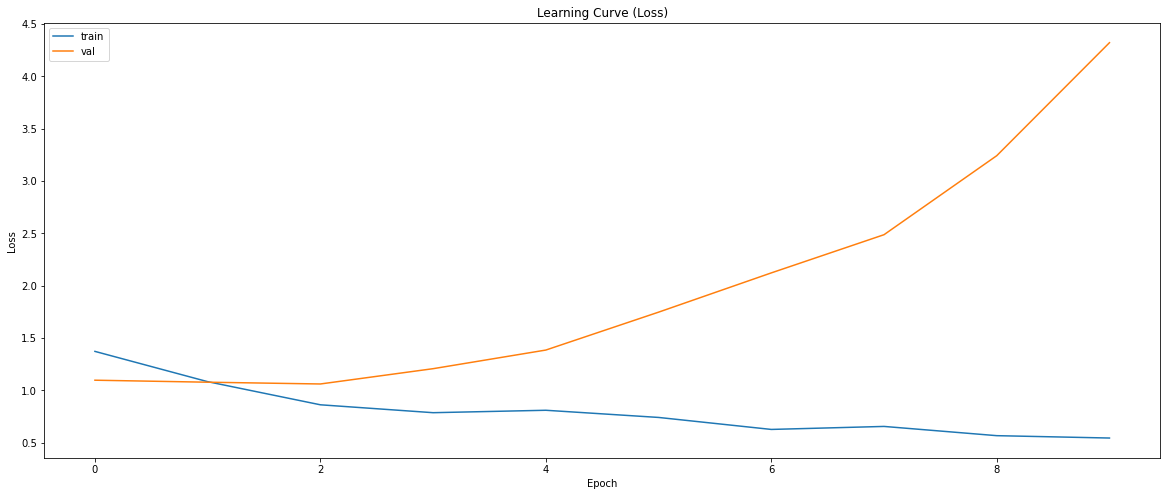

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
#ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

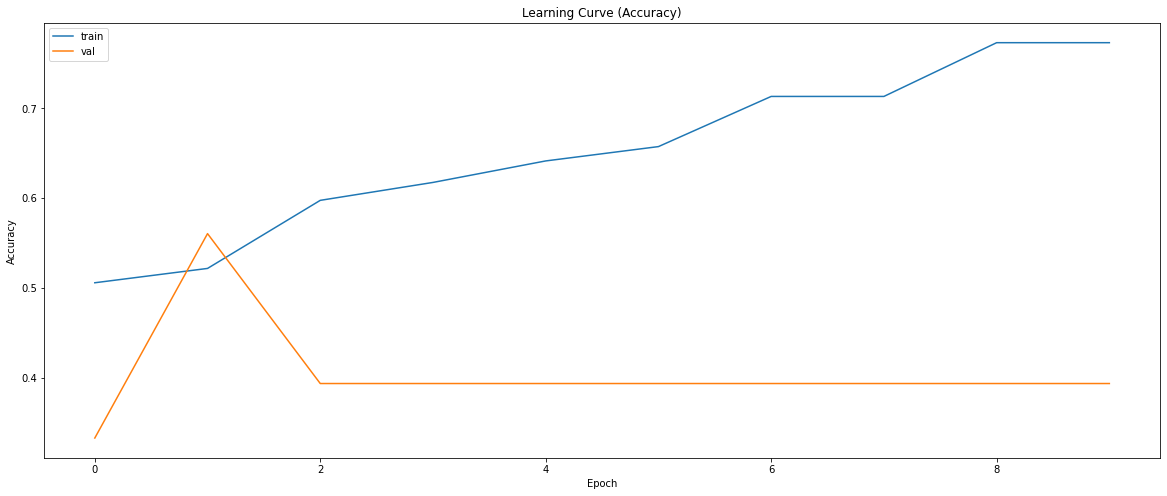

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
#ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 4.322160243988037
Val accuracy: 0.39393940567970276


## **Transfer learning using mobile net**

In [ ]:
mobilenet = tf.keras.applications.MobileNetV2(weights='imagenet',
                                               input_shape=(IMG_SIZE,IMG_SIZE,3),
                                               include_top=False)
mobilenet.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
for layer in mobilenet.layers:
  print(layer, ".....", layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fab561051d0> ..... False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fabb00d8d90> ..... False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fabbbb8d790> ..... False
<keras.layers.activation.relu.ReLU object at 0x7fab560f4590> ..... False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7fab562e8e10> ..... False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fabcdbe3510> ..... False
<keras.layers.activation.relu.ReLU object at 0x7fab56260350> ..... False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fab56136910> ..... False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fab56122e90> ..... False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fab560b5050> ..... False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fab560b5f10> ..... False
<keras.layers.activa

## **Create the model - Convolution part of the model is covered by large model (MobileNet) in this case, so only ANN needs to be created**

In [ ]:
model2 = Sequential()

# Add the MobileNet base model
model2.add(mobilenet)

# Fully connected network (ANN)
model2.add(layers.Flatten())
model2.add(layers.Dense(1024, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(3, activation='softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 5120)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              5243904   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 7,504,963
Trainable params: 5,246,979
Non-trainable params: 2,257,984
______________________________________

In [ ]:
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model2.fit(ds_train,
                    epochs=15,
                    batch_size=BATCH,
                    validation_data=ds_test,
                    #callbacks=[early_stopping],
                    steps_per_epoch=len(df_train)/BATCH,
                    validation_steps=len(df_test)/BATCH
                    )

Epoch 1/15
7/7 [==============================] - 16s 2s/step - loss: 4.5631 - accuracy: 0.5936 - val_loss: 1.2638 - val_accuracy: 0.6667
Epoch 2/15
7/7 [==============================] - 11s 1s/step - loss: 1.7605 - accuracy: 0.7092 - val_loss: 0.5455 - val_accuracy: 0.8485
Epoch 3/15
7/7 [==============================] - 11s 1s/step - loss: 0.7057 - accuracy: 0.8207 - val_loss: 1.1404 - val_accuracy: 0.6818
Epoch 4/15
7/7 [==============================] - 12s 2s/step - loss: 0.6553 - accuracy: 0.8327 - val_loss: 1.4727 - val_accuracy: 0.5909
Epoch 5/15
7/7 [==============================] - 12s 2s/step - loss: 0.5976 - accuracy: 0.8486 - val_loss: 0.9133 - val_accuracy: 0.7121
Epoch 6/15
7/7 [==============================] - 11s 1s/step - loss: 0.5667 - accuracy: 0.8486 - val_loss: 0.5912 - val_accuracy: 0.8636
Epoch 7/15
7/7 [==============================] - 11s 1s/step - loss: 0.8541 - accuracy: 0.8207 - val_loss: 0.5483 - val_accuracy: 0.8182
Epoch 8/15
7/7 [==================

In [ ]:
model_path = '/content/drive/MyDrive/models/'
mdl_path = os.path.join(model_path,"mobilenet.h5")
model2.save(mdl_path)

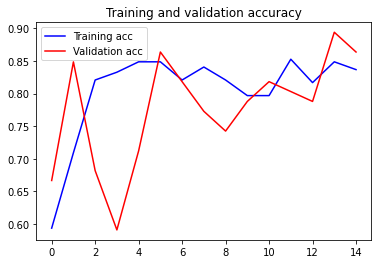

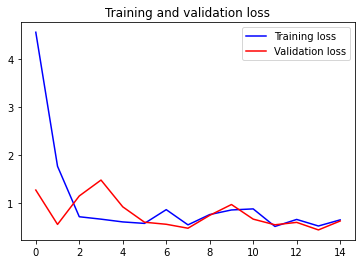

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(15)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
score = model2.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.6167885661125183
Val accuracy: 0.8636363744735718


## **Transfer learning using DenseNet121**

In [ ]:
densenet = tf.keras.applications.DenseNet121(weights='imagenet',
                                               input_shape=(IMG_SIZE,IMG_SIZE,3),
                                               include_top=False)
densenet.trainable=False

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
densenet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 54, 54, 3)   0           ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 24, 24, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [ ]:
model3 = Sequential()

# Add the MobileNet base model
model3.add(densenet)

# Fully connected network (ANN)
model3.add(layers.Flatten())
model3.add(layers.Dense(1024, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 8,090,179
Trainable params: 1,052,675
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history3 = model3.fit(ds_train,
                    epochs=15,
                    batch_size=BATCH,
                    validation_data=ds_test,
                    #callbacks=[early_stopping],
                    steps_per_epoch=len(df_train)/BATCH,
                    validation_steps=len(df_test)/BATCH
                    )

Epoch 1/15
7/7 [==============================] - 22s 2s/step - loss: 0.8921 - accuracy: 0.6255 - val_loss: 0.3924 - val_accuracy: 0.8485
Epoch 2/15
7/7 [==============================] - 11s 1s/step - loss: 0.6318 - accuracy: 0.8048 - val_loss: 0.8280 - val_accuracy: 0.7727
Epoch 3/15
7/7 [==============================] - 11s 1s/step - loss: 0.5552 - accuracy: 0.8008 - val_loss: 0.5075 - val_accuracy: 0.8333
Epoch 4/15
7/7 [==============================] - 12s 2s/step - loss: 0.3986 - accuracy: 0.8685 - val_loss: 0.6166 - val_accuracy: 0.7576
Epoch 5/15
7/7 [==============================] - 11s 1s/step - loss: 0.4565 - accuracy: 0.8406 - val_loss: 0.4200 - val_accuracy: 0.8333
Epoch 6/15
7/7 [==============================] - 11s 1s/step - loss: 0.3605 - accuracy: 0.8526 - val_loss: 0.3663 - val_accuracy: 0.8939
Epoch 7/15
7/7 [==============================] - 11s 1s/step - loss: 0.3627 - accuracy: 0.8805 - val_loss: 0.5140 - val_accuracy: 0.8182
Epoch 8/15
7/7 [==================

In [ ]:
model_path = '/content/drive/MyDrive/models/'
mdl_path = os.path.join(model_path,"densenet.h5")
model3.save(mdl_path)

In [ ]:
score = model.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('CNN Val loss:', score[0])
print('CNN Val accuracy:', score[1])

CNN Val loss: 4.322159767150879
CNN Val accuracy: 0.39393940567970276


In [ ]:
score = model2.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('MobileNet Val loss:', score[0])
print('MobileNet Val accuracy:', score[1])

MobileNet Val loss: 0.6167886853218079
MobileNet Val accuracy: 0.8636363744735718


In [ ]:
score = model3.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('DenseNet Val loss:', score[0])
print('DenseNet Val accuracy:', score[1])

DenseNet Val loss: 0.25490131974220276
DenseNet Val accuracy: 0.8939393758773804


## **Compare all the models on the basis of accuracy, precision, recall, and f1-score**

In [ ]:
num_labels = {'Healthy':0,
              'Type 1 disease':1,
              'Type 2 disease':2}
y_test = df_test['class'].copy().map(num_labels).astype('int')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

3/3 [==============================] - 2s 415ms/step
              precision    recall  f1-score   support

           0       0.17      0.10      0.12        20
           1       0.40      0.38      0.39        26
           2       0.24      0.35      0.29        20

    accuracy                           0.29        66
   macro avg       0.27      0.28      0.27        66
weighted avg       0.28      0.29      0.28        66



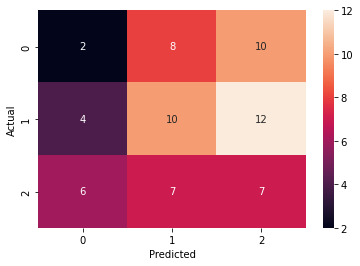

In [ ]:
y_preds_mdl2 = model2.predict(ds_test,verbose=True)
y_pred_mdl2 = np.argmax(y_preds_mdl2,axis=-1)
cm_mdl2 = confusion_matrix(ds_test.classes, y_pred_mdl2)
sns.heatmap(cm_mdl2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
cr_mdl2 = classification_report(ds_test.classes, y_pred_mdl2)
print(cr_mdl2)

3/3 [==============================] - 1s 366ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.39      1.00      0.57        26
           2       0.00      0.00      0.00        20

    accuracy                           0.39        66
   macro avg       0.13      0.33      0.19        66
weighted avg       0.16      0.39      0.22        66



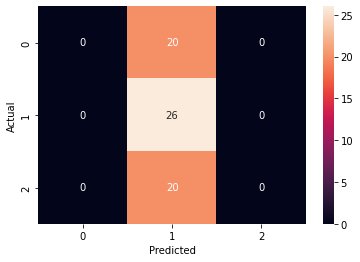

In [ ]:
y_preds_mdl = model.predict(ds_test)
y_pred_mdl = np.argmax(y_preds_mdl,axis=-1)
cm_mdl = confusion_matrix(ds_test.classes, y_pred_mdl)
sns.heatmap(cm_mdl, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
cr_mdl = classification_report(ds_test.classes, y_pred_mdl)
print(cr_mdl)

3/3 [==============================] - 3s 346ms/step
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       0.25      0.23      0.24        26
           2       0.09      0.10      0.10        20

    accuracy                           0.29        66
   macro avg       0.30      0.29      0.30        66
weighted avg       0.29      0.29      0.29        66



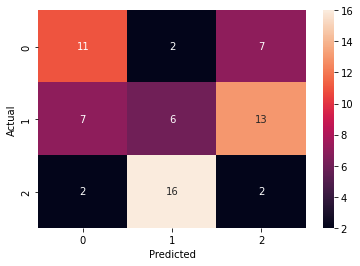

In [ ]:
y_preds_mdl3 = model3.predict(ds_test)
y_pred_mdl3 = np.argmax(y_preds_mdl3,axis=-1)
cm_mdl3 = confusion_matrix(ds_test.classes, y_pred_mdl3)
sns.heatmap(cm_mdl3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
cr_mdl3 = classification_report(ds_test.classes, y_pred_mdl3)
print(cr_mdl3)